Definir funções de benchmark

In [31]:
import numpy as np

# 0. Linear Function
def linear(x, c=0):
    x = np.array(x)
    return np.sum(x) - c   #This one is just to shift the whole function
    #return np.sum(x - c)

# 1. Sphere Function
def sphere(x, c=0):
    x = np.array(x)
    return np.sum(np.square(x)) - c   #This one is for getting negative values
    #return np.sum(np.square(x - c))

# 2. Rosenbrock Function
def rosenbrock(x, c=0):
    if len(x)==2:
        x = np.array(x)  # Ensure input is a NumPy array
        return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (x[:-1] - 1)**2) - c
    else:
        x = np.array(x)  # Ensure input is a NumPy array
        return np.sum(100 * (x - x**2)**2 + (x - 1)**2) - c
        
# 3. Ackley Function
def ackley(x, c=0):
    x = np.array(x)
    d = len(x)
    return -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / d)) - np.exp(np.sum(np.cos(2 * np.pi * x)) / d) + 20 + np.e - c

# 4. Rastrigin Function
def rastrigin(x, c=0):
    x = np.array(x)
    d = len(x)
    return 10 * d + np.sum(x**2 - 10 * np.cos(2 * np.pi * x)) - c

# 5. Levy Function
def levy(x, c=0):
    x = np.array(x)
    w = 1 + (x - 1) / 4
    term1 = np.sin(np.pi * w[0])**2
    term2 = np.sum((w[:-1] - 1)**2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1)**2))
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)
    return term1 + term2 + term3 - c


In [32]:
from scipy.optimize import approx_fprime

# Small step for numerical differentiation
eps = np.sqrt(np.finfo(float).eps)

# Automatic gradient computation using finite differences

def grad_linear(x):
    return approx_fprime(x, linear, eps)

def grad_sphere(x):
    return approx_fprime(x, sphere, eps)

def grad_rosenbrock(x):
    return approx_fprime(x, rosenbrock, eps)

def grad_ackley(x):
    return approx_fprime(x, ackley, eps)

def grad_rastrigin(x):
    return approx_fprime(x, rastrigin, eps)

def grad_levy(x):
    return approx_fprime(x, levy, eps)


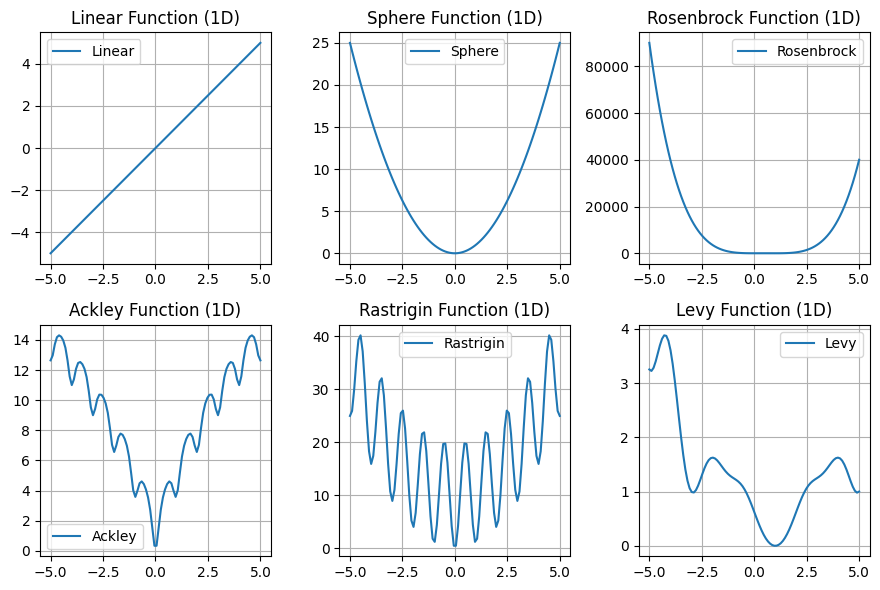

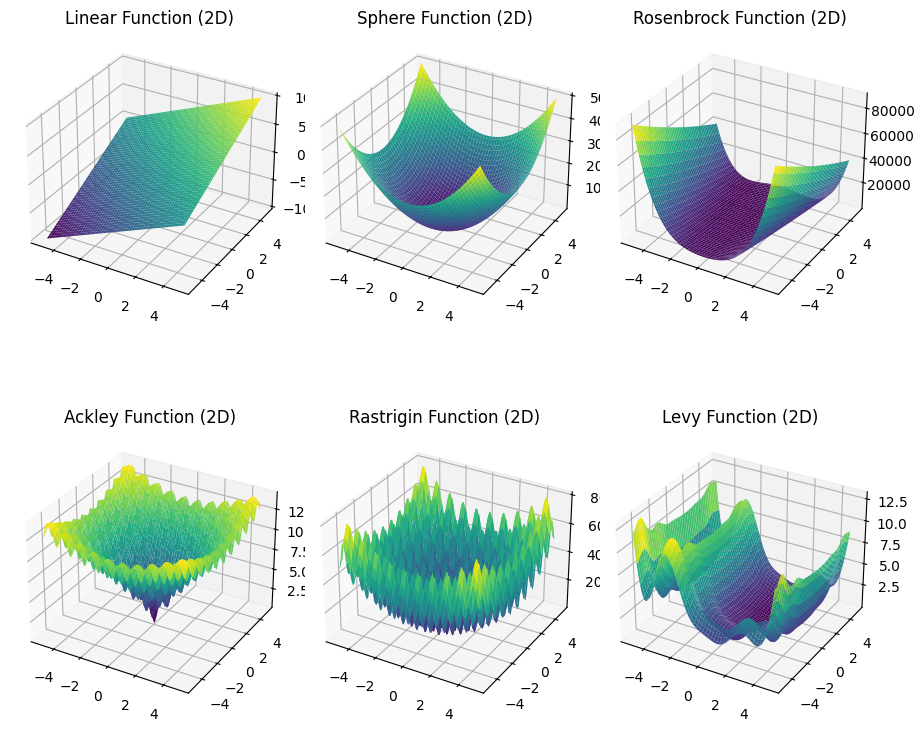

In [33]:
import matplotlib.pyplot as plt

# Reinitialize x_range and meshgrid in case they were lost
x_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, x_range)

# Recompute function evaluations in 1D and 2D
y_linear = np.array([linear([x]) for x in x_range])
y_sphere = np.array([sphere([x]) for x in x_range])
y_rosenbrock = np.array([rosenbrock([x]) for x in x_range])  # 2D case
y_ackley = np.array([ackley([x]) for x in x_range])
y_rastrigin = np.array([rastrigin([x]) for x in x_range])
y_levy = np.array([levy([x]) for x in x_range])

Z_linear = np.array([linear([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z_sphere = np.array([sphere([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z_rosenbrock = np.array([rosenbrock([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z_ackley = np.array([ackley([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z_rastrigin = np.array([rastrigin([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z_levy = np.array([levy([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

"""
# Plot 1D functions
fig, axs = plt.subplots(5, 1, figsize=(6, 15))
functions = ['Sphere', 'Rosenbrock', 'Ackley', 'Rastrigin', 'Levy']
y_values = [y_sphere, y_rosenbrock, y_ackley, y_rastrigin, y_levy]

for i, (name, y) in enumerate(zip(functions, y_values)):
    axs[i].plot(x_range, y, label=name)
    axs[i].set_title(name + " Function (1D)")
    axs[i].legend()
    axs[i].grid()

plt.tight_layout()
plt.show()

# Plot 2D functions
fig2, axs2 = plt.subplots(3, 2, figsize=(9, 12), subplot_kw={"projection": "3d"})
Z_values = [Z_sphere, Z_rosenbrock, Z_ackley, Z_rastrigin, Z_levy]
for i, (name, Z) in enumerate(zip(functions, Z_values)):
    ax = axs2[i // 2, i % 2]
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(name + " Function (2D)")

plt.tight_layout()
plt.show()
"""

# Plot 1D functions in a 3-column, 2-row layout
fig, axs = plt.subplots(2, 3, figsize=(9, 6))  # 2 rows, 3 columns
functions = ['Linear', 'Sphere', 'Rosenbrock', 'Ackley', 'Rastrigin', 'Levy']
y_values = [y_linear, y_sphere, y_rosenbrock, y_ackley, y_rastrigin, y_levy]

for i, (name, y) in enumerate(zip(functions, y_values)):
    row, col = divmod(i, 3)  # Compute row and column indices
    axs[row, col].plot(x_range, y, label=name)
    axs[row, col].set_title(name + " Function (1D)")
    axs[row, col].legend()
    axs[row, col].grid()

# Hide any empty subplot (if fewer than 6 functions are plotted)
if len(functions) < 6:
    axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Plot 2D functions in a 3-column, 2-row layout
fig2, axs2 = plt.subplots(2, 3, figsize=(9, 9), subplot_kw={"projection": "3d"})  # 2 rows, 3 columns
Z_values = [Z_linear, Z_sphere, Z_rosenbrock, Z_ackley, Z_rastrigin, Z_levy]

for i, (name, Z) in enumerate(zip(functions, Z_values)):
    row, col = divmod(i, 3)  # Compute row and column indices
    axs2[row, col].plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    axs2[row, col].set_title(name + " Function (2D)")

# Hide any empty subplot (if fewer than 6 functions are plotted)
if len(functions) < 6:
    axs2[1, 2].axis('off')

plt.tight_layout()
plt.show()



#TODO
Add samples using monte carlo to have a realistic data for machine learning instead of having full access to the function

Definir parametros do modelo
- Nesse caso anterior a gente só quer escolher o x que tem o menor custo.
- No caso de machine learning a gente na verdade quer definir os parametros de uma função que como resultado tem o menor custo

Definir metodo de otimização


In [34]:
# Implementing a simple gradient-based optimization (Gradient Descent)
def gradient_descent(f, grad_f, x0, learning_rate=0.1, max_iters=50, tol=1e-6):
    """
    Gradient Descent Algorithm
    - f: function to minimize
    - grad_f: gradient of the function
    - x0: initial guess
    - learning_rate: step size
    - max_iters: maximum iterations
    - tol: stopping criterion
    """
    x = np.array(x0)
    history = [x.copy()]  # Store path of optimization
    for i in range(max_iters):
        grad = np.array(grad_f(x))
        x = x - learning_rate * grad  # Gradient descent step
        history.append(x.copy())  # Save step

        # Stopping condition: if change is small
        if np.linalg.norm(grad) < tol:
            break

    return x, history

"""
# Initial point
x0 = np.random.uniform(-5, 5, 2)

# Run gradient descent
final_x, steps = gradient_descent(sphere, grad_sphere, x0, learning_rate=0.1, max_iters=50)

# Convert steps to array for plotting
steps_array = np.array(steps)

# Plot convergence of function value
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(len(steps)), [sphere(x) for x in steps], marker='o', linestyle='-')
ax.set_xlabel("Iteration")
ax.set_ylabel("Function Value (f(x))")
ax.set_title("Convergence of Gradient Descent on Sphere Function")
ax.grid()
plt.show()

# 2D visualization of path
fig2, ax2 = plt.subplots(figsize=(6, 6))
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([sphere([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

ax2.contour(X, Y, Z, levels=30, cmap='viridis')
ax2.plot(steps_array[:, 0], steps_array[:, 1], marker='o', color='red', linestyle='-', label="Optimization Path")
ax2.scatter(0, 0, color='blue', marker='x', label="Optimal Solution")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Optimization Path on Sphere Function")
ax2.legend()
plt.show()

# Return final result and steps
#final_x, steps
"""


'\n# Initial point\nx0 = np.random.uniform(-5, 5, 2)\n\n# Run gradient descent\nfinal_x, steps = gradient_descent(sphere, grad_sphere, x0, learning_rate=0.1, max_iters=50)\n\n# Convert steps to array for plotting\nsteps_array = np.array(steps)\n\n# Plot convergence of function value\nfig, ax = plt.subplots(figsize=(6, 4))\nax.plot(range(len(steps)), [sphere(x) for x in steps], marker=\'o\', linestyle=\'-\')\nax.set_xlabel("Iteration")\nax.set_ylabel("Function Value (f(x))")\nax.set_title("Convergence of Gradient Descent on Sphere Function")\nax.grid()\nplt.show()\n\n# 2D visualization of path\nfig2, ax2 = plt.subplots(figsize=(6, 6))\nX, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))\nZ = np.array([sphere([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)\n\nax2.contour(X, Y, Z, levels=30, cmap=\'viridis\')\nax2.plot(steps_array[:, 0], steps_array[:, 1], marker=\'o\', color=\'red\', linestyle=\'-\', label="Optimization Path")\nax2.scatter(0, 0, colo

In [35]:
"""
# Functions to optimize in 1D
functions_1d = {
    "Sphere": (sphere, grad_sphere),
    "Rosenbrock": (rosenbrock, grad_rosenbrock),
    "Ackley": (ackley, grad_ackley),
    "Rastrigin": (rastrigin, grad_rastrigin),
    "Levy": (levy, grad_levy)
}

# Initialize storage for results
results_1d = {}

# Set up plotting for 1D case
fig, axs = plt.subplots(len(functions_1d), 2, figsize=(12, 20))

# Iterate over all benchmark functions in 1D
for i, (name, (func, grad_func)) in enumerate(functions_1d.items()):
    # Initialize a random starting point in 1D
    x0 = np.random.uniform(-5, 5, 1)

    # Run Gradient Descent in 1D
    final_x, steps = gradient_descent(func, grad_func, x0, learning_rate=0.01, max_iters=1000)
    steps_array = np.array(steps)

    # Store final result
    results_1d[name] = final_x

    # Plot convergence
    axs[i, 0].plot(range(len(steps)), [func(x) for x in steps], marker='o', linestyle='-')
    axs[i, 0].set_xlabel("Iteration")
    axs[i, 0].set_ylabel("Function Value (f(x))")
    axs[i, 0].set_title(f"Convergence of Gradient Descent on {name} Function (1D)")
    axs[i, 0].grid()

    # Create 1D function plot with optimization path
    x_vals = np.linspace(-5, 5, 100)
    y_vals = np.array([func([x]) for x in x_vals])

    axs[i, 1].plot(x_vals, y_vals, label=f"{name} Function", color='blue')
    axs[i, 1].scatter(steps_array, [func(x) for x in steps_array], color='red', marker='o', label="Optimization Path")
    axs[i, 1].set_xlabel("x")
    axs[i, 1].set_ylabel("f(x)")
    axs[i, 1].set_title(f"Optimization Path on {name} Function (1D)")
    axs[i, 1].legend()
    axs[i, 1].grid()

plt.tight_layout()
plt.show()

# Return final results of optimization in 1D
results_1d
"""


'\n# Functions to optimize in 1D\nfunctions_1d = {\n    "Sphere": (sphere, grad_sphere),\n    "Rosenbrock": (rosenbrock, grad_rosenbrock),\n    "Ackley": (ackley, grad_ackley),\n    "Rastrigin": (rastrigin, grad_rastrigin),\n    "Levy": (levy, grad_levy)\n}\n\n# Initialize storage for results\nresults_1d = {}\n\n# Set up plotting for 1D case\nfig, axs = plt.subplots(len(functions_1d), 2, figsize=(12, 20))\n\n# Iterate over all benchmark functions in 1D\nfor i, (name, (func, grad_func)) in enumerate(functions_1d.items()):\n    # Initialize a random starting point in 1D\n    x0 = np.random.uniform(-5, 5, 1)\n\n    # Run Gradient Descent in 1D\n    final_x, steps = gradient_descent(func, grad_func, x0, learning_rate=0.01, max_iters=1000)\n    steps_array = np.array(steps)\n\n    # Store final result\n    results_1d[name] = final_x\n\n    # Plot convergence\n    axs[i, 0].plot(range(len(steps)), [func(x) for x in steps], marker=\'o\', linestyle=\'-\')\n    axs[i, 0].set_xlabel("Iteration")

/var/folders/7c/12d1bdbs4cvbh7zksb_8wcgw0000gn/T/ipykernel_87446/4186714637.py:22: RuntimeWarning: overflow encountered in square
  return np.sum(100 * (x - x**2)**2 + (x - 1)**2) - c
/Users/edsonodake/Library/Python/3.9/lib/python/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


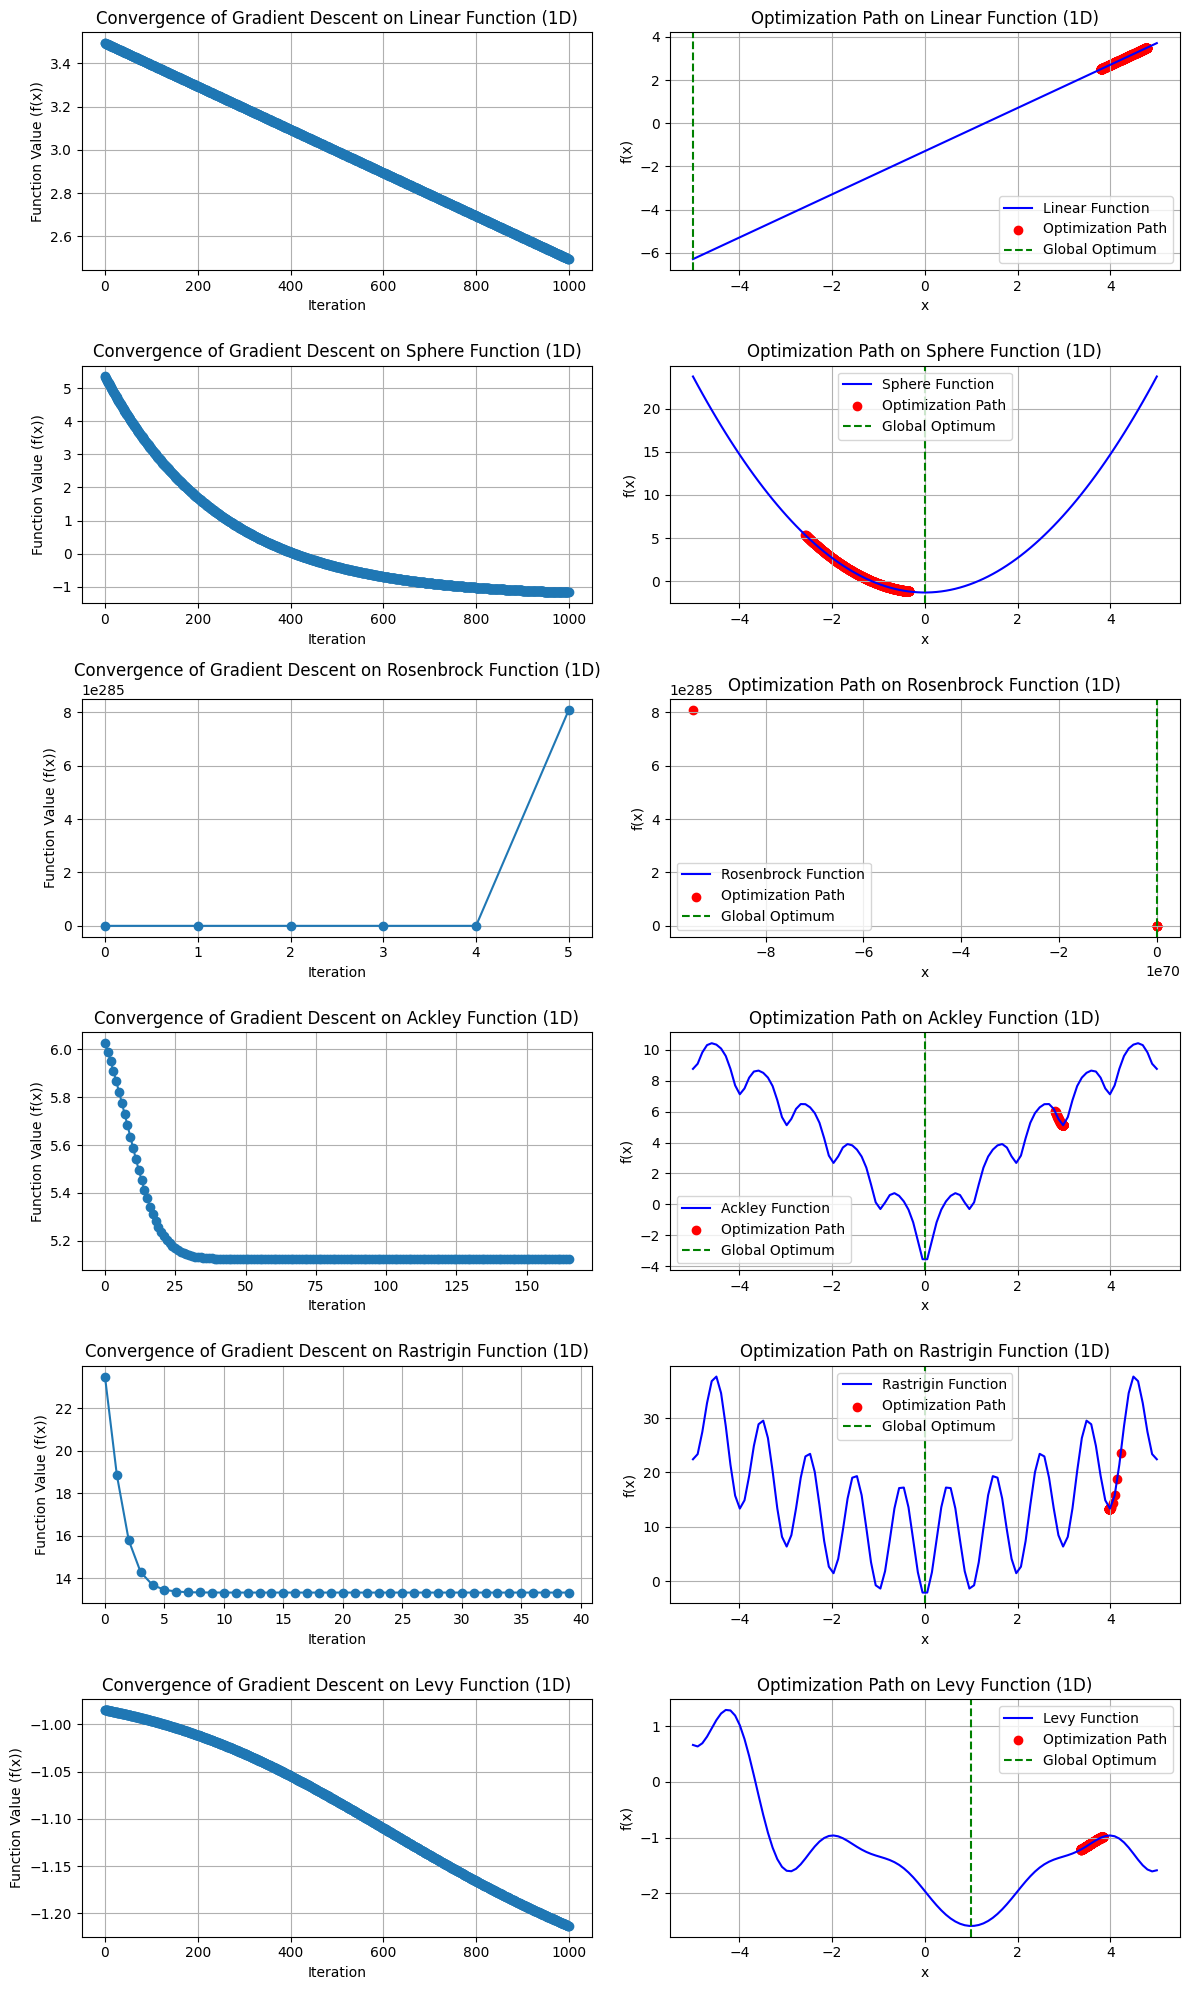

In [36]:
import random

# Functions to optimize in 1D
functions_1d = {
    "Linear": (linear, grad_linear),
    "Sphere": (sphere, grad_sphere),
    "Rosenbrock": (rosenbrock, grad_rosenbrock),
    "Ackley": (ackley, grad_ackley),
    "Rastrigin": (rastrigin, grad_rastrigin),
    "Levy": (levy, grad_levy)
}

# Initialize storage for results
results_1d = {}

# Dictionary of global optima for each function in 1D
global_optima = {
    "Linear": [-5],
    "Sphere": [0],
    "Rosenbrock": [1],  # Minimum at x=1
    "Ackley": [0],  # Global minimum at x=0
    "Rastrigin": [0],  # Occurs at multiples of 2*pi, simplest is x=0
    "Levy": [1],  # Global minimum at x=1
}

c = random.uniform(1, 5)

shifting_function = {
    "Linear": c*1,
    "Sphere": c*1,
    "Rosenbrock": c*10000, 
    "Ackley":  c*3,  
    "Rastrigin":  c*2,
    "Levy":  c*2,
}



# Replot with global optima marked
fig, axs = plt.subplots(len(functions_1d), 2, figsize=(12, 20))

for i, (name, (func, grad_func)) in enumerate(functions_1d.items()):
    # Initial random start
    x0 = np.random.uniform(-5, 5, 1)

    # Run Gradient Descent in 1D
    final_x, steps = gradient_descent(func, grad_func, x0, learning_rate=0.001, max_iters=1000)
    steps_array = np.array(steps)

    # Plot convergence
    axs[i, 0].plot(range(len(steps)), [func(x, shifting_function[name]) for x in steps], marker='o', linestyle='-')
    axs[i, 0].set_xlabel("Iteration")
    axs[i, 0].set_ylabel("Function Value (f(x))")
    axs[i, 0].set_title(f"Convergence of Gradient Descent on {name} Function (1D)")
    axs[i, 0].grid()

    # Create 1D function plot with optimization path
    x_vals = np.linspace(-5, 5, 100)
    y_vals = np.array([func([x], shifting_function[name]) for x in x_vals])

    axs[i, 1].plot(x_vals, y_vals, label=f"{name} Function", color='blue')
    axs[i, 1].scatter(steps_array, [func(x, shifting_function[name]) for x in steps_array], color='red', marker='o', label="Optimization Path")
    
    # Mark global optima
    for opt in global_optima[name]:
        axs[i, 1].axvline(opt, color='green', linestyle='--', label="Global Optimum")

    axs[i, 1].set_xlabel("x")
    axs[i, 1].set_ylabel("f(x)")
    axs[i, 1].set_title(f"Optimization Path on {name} Function (1D)")
    axs[i, 1].legend()
    axs[i, 1].grid()

plt.tight_layout()
plt.show()


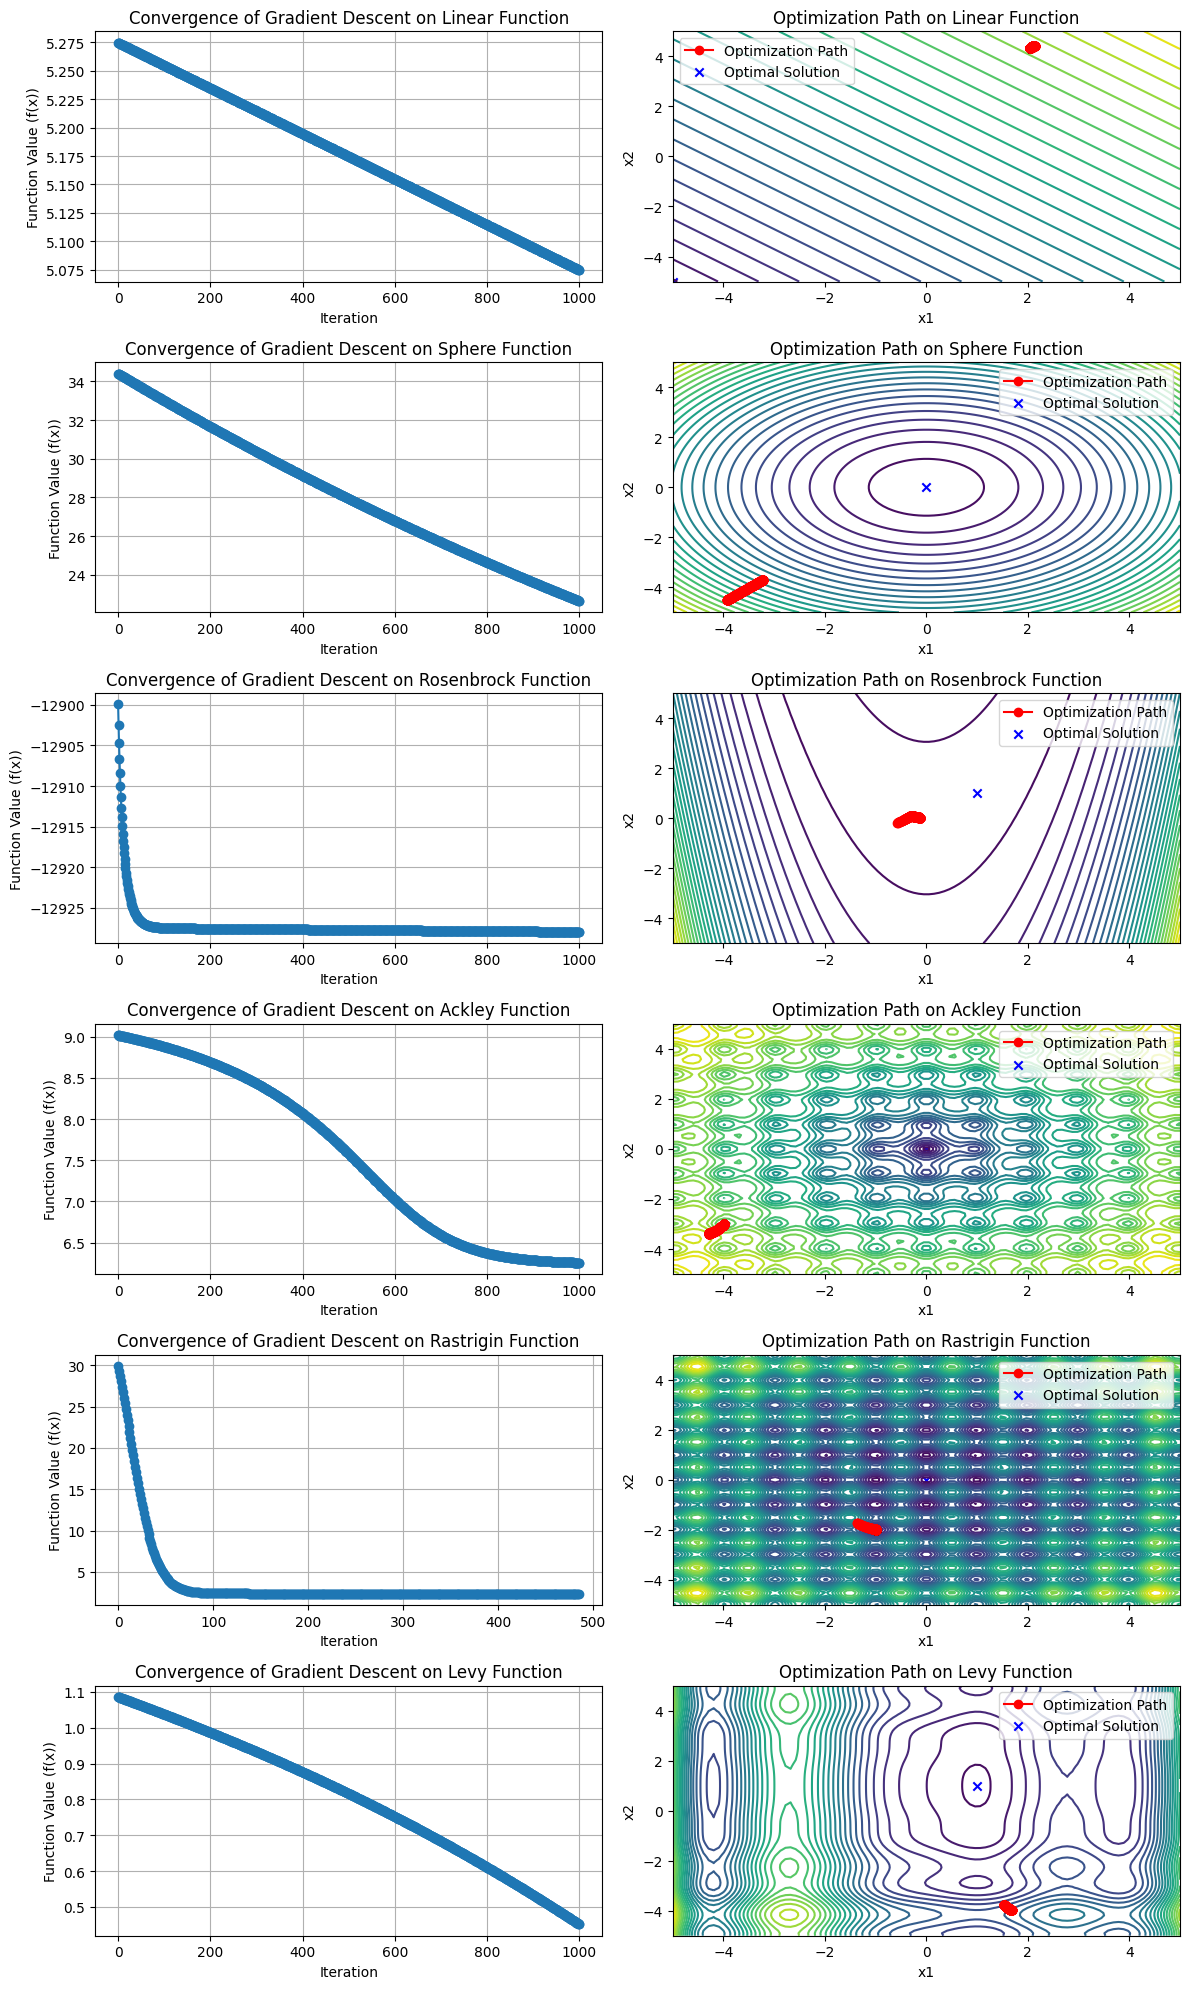

In [37]:
# Functions to optimize
functions = {
    "Linear": (linear, grad_linear),
    "Sphere": (sphere, grad_sphere),
    "Rosenbrock": (rosenbrock, grad_rosenbrock),
    "Ackley": (ackley, grad_ackley),
    "Rastrigin": (rastrigin, grad_rastrigin),
    "Levy": (levy, grad_levy)
}

# Known global minima for benchmark functions
global_minima = {
    "Linear": [-5, -5],        # Global minimum at (0,0)
    "Sphere": [0, 0],        # Global minimum at (0,0)
    "Rosenbrock": [1, 1],    # Global minimum at (1,1)
    "Ackley": [0, 0],        # Global minimum at (0,0)
    "Rastrigin": [0, 0],     # Global minimum at (0,0)
    "Levy": [1, 1]           # Global minimum at (1,1)
}


# Initialize storage for results
results = {}

# Set up plotting
fig, axs = plt.subplots(len(functions), 2, figsize=(12, 20))

# Iterate over all benchmark functions
for i, (name, (func, grad_func)) in enumerate(functions.items()):
    # Initialize a random starting point
    x0 = np.random.uniform(-5, 5, 2)

    # Run Gradient Descent
    final_x, steps = gradient_descent(func, grad_func, x0, learning_rate=0.0001, max_iters=1000)
    steps_array = np.array(steps)

    # Store final result
    results[name] = final_x

    # Plot convergence
    axs[i, 0].plot(range(len(steps)), [func(x, shifting_function[name]) for x in steps], marker='o', linestyle='-')
    axs[i, 0].set_xlabel("Iteration")
    axs[i, 0].set_ylabel("Function Value (f(x))")
    axs[i, 0].set_title(f"Convergence of Gradient Descent on {name} Function")
    axs[i, 0].grid()

    # Create contour plot of function and optimization path
    X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    Z = np.array([func([x, y], shifting_function[name]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    axs[i, 1].contour(X, Y, Z, levels=30, cmap='viridis')
    axs[i, 1].plot(steps_array[:, 0], steps_array[:, 1], marker='o', color='red', linestyle='-', label="Optimization Path")
    #axs[i, 1].scatter(0, 0, color='blue', marker='x', label="Optimal Solution")
    optimal_x, optimal_y = global_minima[name]  # Retrieve correct coordinates
    axs[i, 1].scatter(optimal_x, optimal_y, color='blue', marker='x', label="Optimal Solution")
    axs[i, 1].set_xlabel("x1")
    axs[i, 1].set_ylabel("x2")
    axs[i, 1].set_title(f"Optimization Path on {name} Function")
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

# Return final results of optimization
#results


Need to do three things:
- The function can be positive and negative
- Need to square the function so the true objective is always positive
- Plot and visualize the space

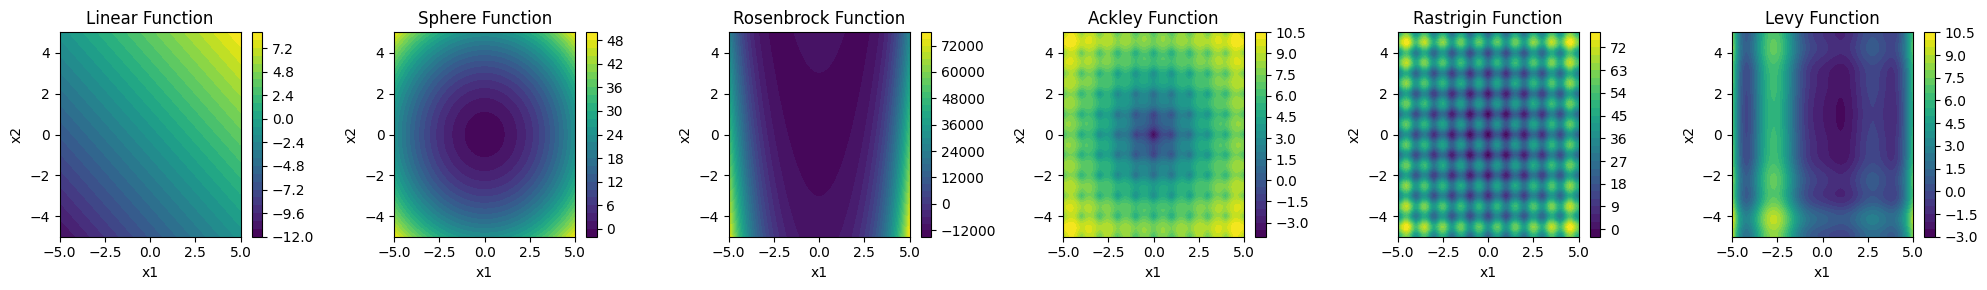

In [38]:
# First, let's generate a 2D heatmap for each function

# Define the plotting grid
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)

# Fix the function dictionary with corrected implementations
functions = {
    "Linear": linear,
    "Sphere": sphere,
    "Rosenbrock": rosenbrock,
    "Ackley": ackley,
    "Rastrigin": rastrigin,
    "Levy": levy
}

# Create a figure with subplots for each function
fig, axs = plt.subplots(1, len(functions), figsize=(20, 3))

# Iterate over all functions and plot their heatmap
for i, (name, func) in enumerate(functions.items()):
    # Compute function values
    Z = np.array([func([x, y], shifting_function[name]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    # Create heatmap using contourf
    cmap = axs[i].contourf(X, Y, Z, levels=30, cmap="viridis")
    axs[i].set_title(f"{name} Function")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")
    fig.colorbar(cmap, ax=axs[i])

plt.tight_layout()
plt.show()


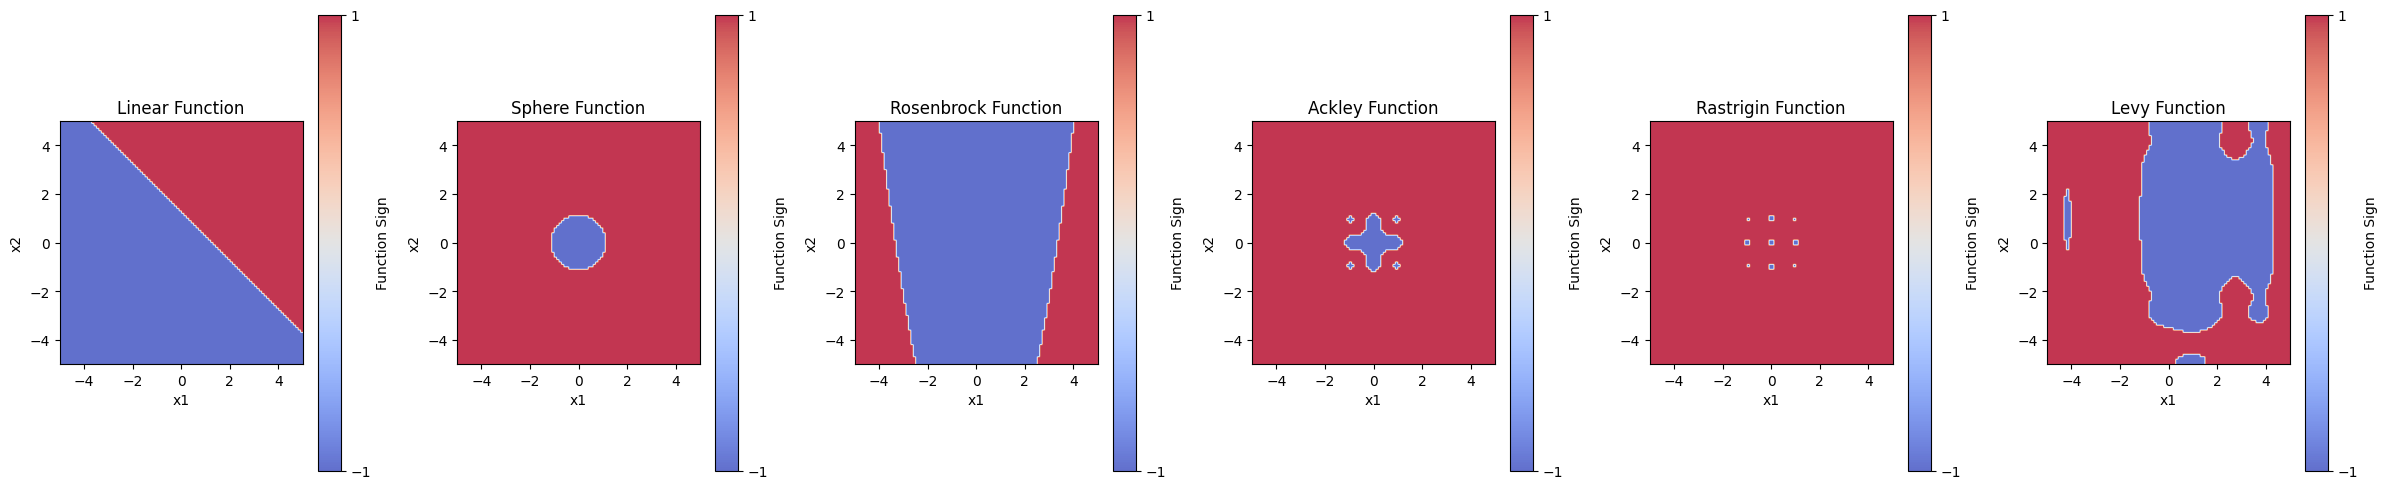

In [39]:
# Generate updated heatmaps where values > 0 and values < 0 have distinct colors

fig, axs = plt.subplots(1, len(functions), figsize=(24, 5))

# Iterate over all functions and plot with binary color mapping
for i, (name, func) in enumerate(functions.items()):
    # Compute function values
    Z = np.array([func([x, y], shifting_function[name]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    # Create a binary color map: One color for Z > 0, another for Z < 0
    binary_Z = np.where(Z >= 0, 1, -1)  # Assign 1 for positive, -1 for negative values

    cmap = axs[i].imshow(binary_Z, extent=[-5, 5, -5, 5], origin="lower", cmap="coolwarm", alpha=0.8)
    axs[i].set_title(f"{name} Function")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")
    fig.colorbar(cmap, ax=axs[i], ticks=[-1, 1], label="Function Sign")

plt.tight_layout()
plt.show()


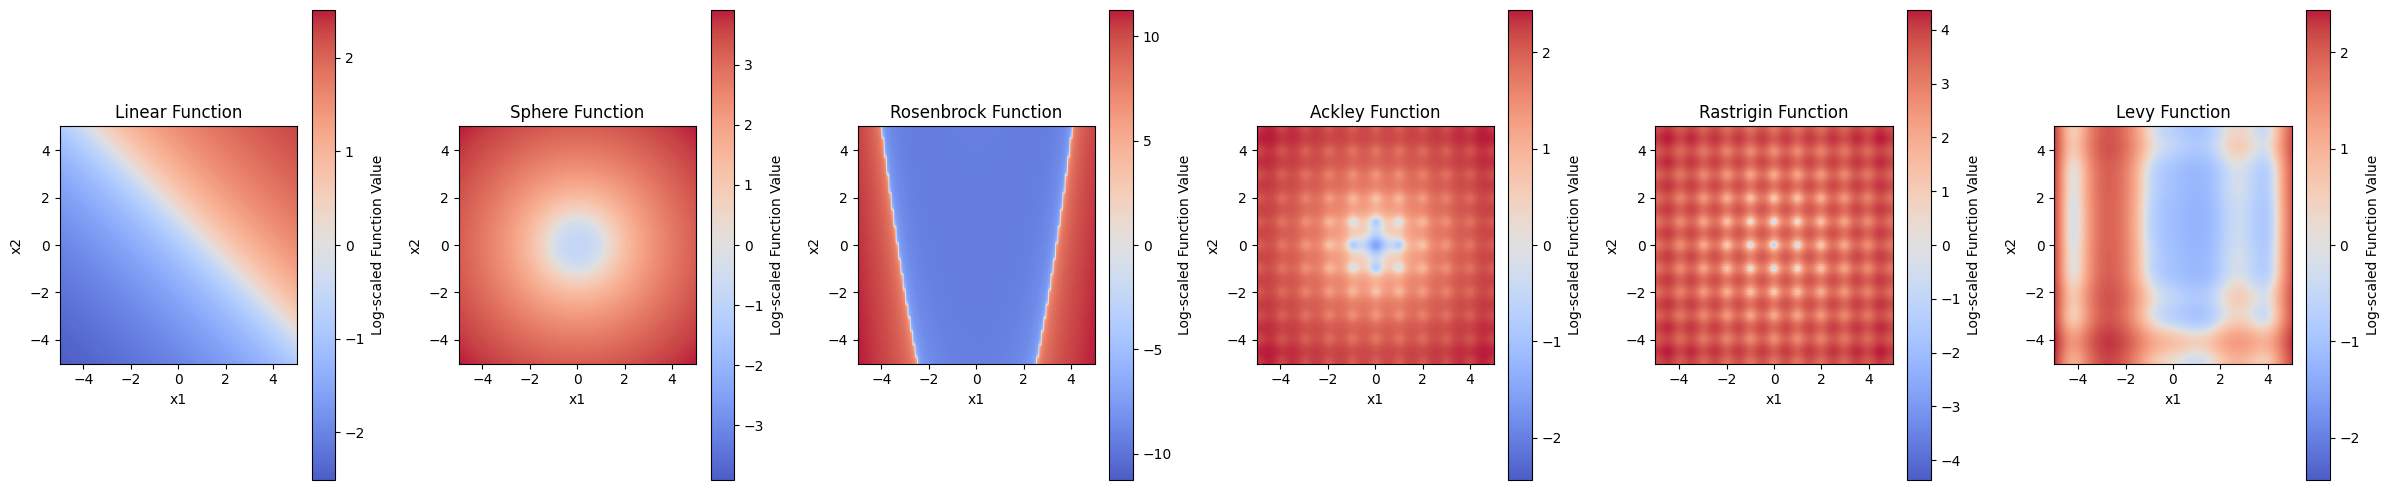

In [40]:
# Generate updated heatmaps ensuring zero is always the threshold for color transition
fig, axs = plt.subplots(1, len(functions), figsize=(24, 5))

# Iterate over all functions and plot with improved scaling
for i, (name, func) in enumerate(functions.items()):
    # Compute function values
    Z = np.array([func([x, y], shifting_function[name]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    # Apply symmetric logarithmic scaling while preserving sign
    epsilon = 1e-6  # Small constant to prevent log(0)
    Z_signed_log = np.sign(Z) * np.log1p(np.abs(Z) + epsilon)  # Keeps zero as threshold

    # Define color range centered at zero (ensuring symmetric color balance)
    max_abs_value = np.max(np.abs(Z_signed_log))
    vmin, vmax = -max_abs_value, max_abs_value

    # Create heatmap with diverging colormap centered at zero
    cmap = axs[i].imshow(Z_signed_log, extent=[-5, 5, -5, 5], origin="lower", cmap="coolwarm", alpha=0.9, vmin=vmin, vmax=vmax)
    axs[i].set_title(f"{name} Function")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")
    fig.colorbar(cmap, ax=axs[i], label="Log-scaled Function Value")

plt.tight_layout()
plt.show()


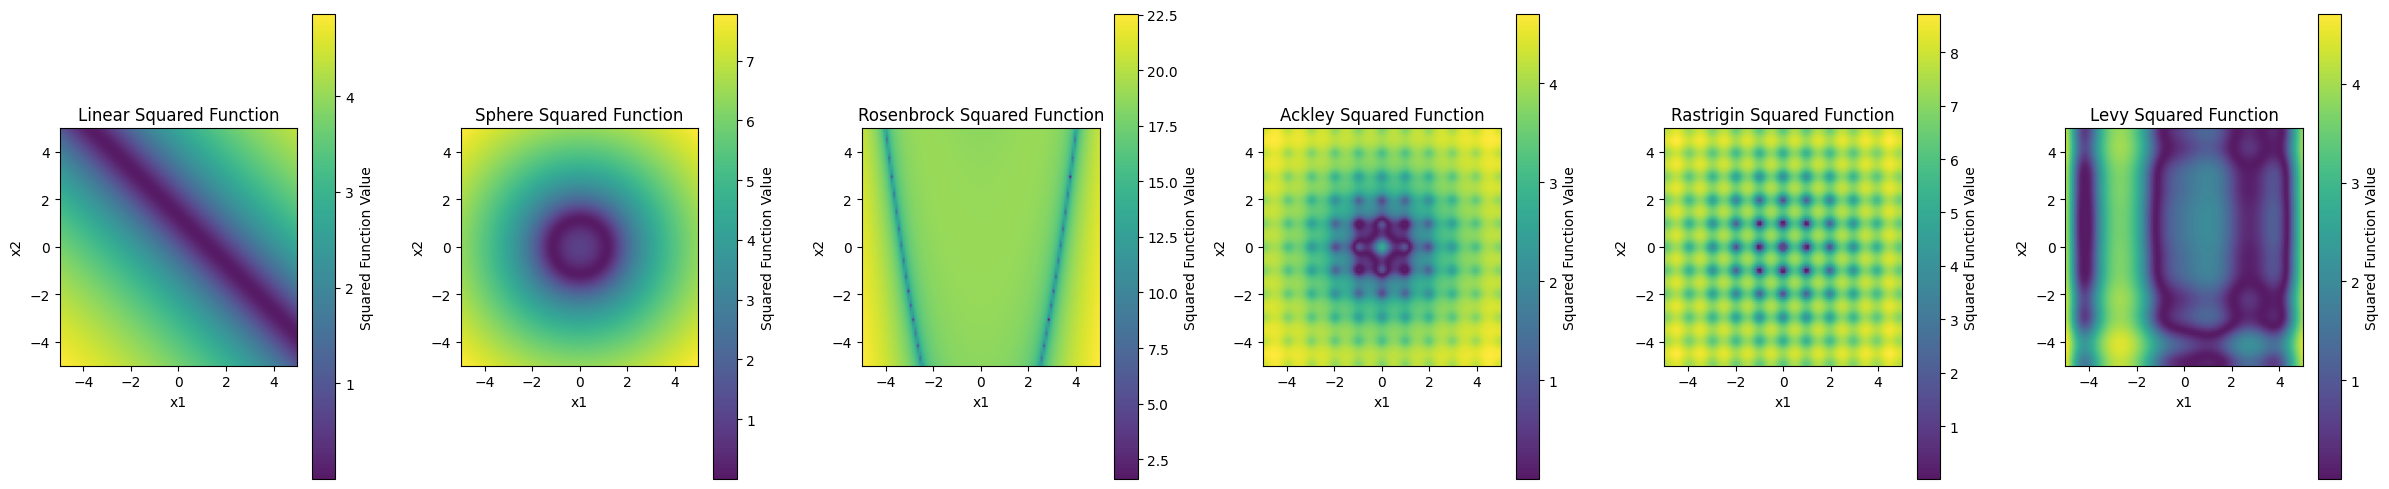

In [41]:
# Generate updated heatmaps for squared function values with a different color palette

fig, axs = plt.subplots(1, len(functions), figsize=(24, 5))

# Choose a new color palette (e.g., "magma", "cividis", "viridis")
new_cmap = "viridis"  

# Iterate over all functions and plot the squared function
for i, (name, func) in enumerate(functions.items()):
    # Compute function values with shifting factor
    Z = np.array([func([x, y], shifting_function[name]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    # Square the function values
    Z_squared = Z ** 2
    
    
    epsilon = 1e-6  # Small constant to prevent log(0)
    Z_squared = np.log1p(Z_squared + epsilon)  # Log transformation for better contrast

    # Define color range (normal scale)
    vmin, vmax = np.min(Z_squared), np.max(Z_squared)

    # Create heatmap using the new color palette
    cmap = axs[i].imshow(Z_squared, extent=[-5, 5, -5, 5], origin="lower", cmap=new_cmap, alpha=0.9, vmin=vmin, vmax=vmax)
    axs[i].set_title(f"{name} Squared Function")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")
    fig.colorbar(cmap, ax=axs[i], label="Squared Function Value")

plt.tight_layout()
plt.show()


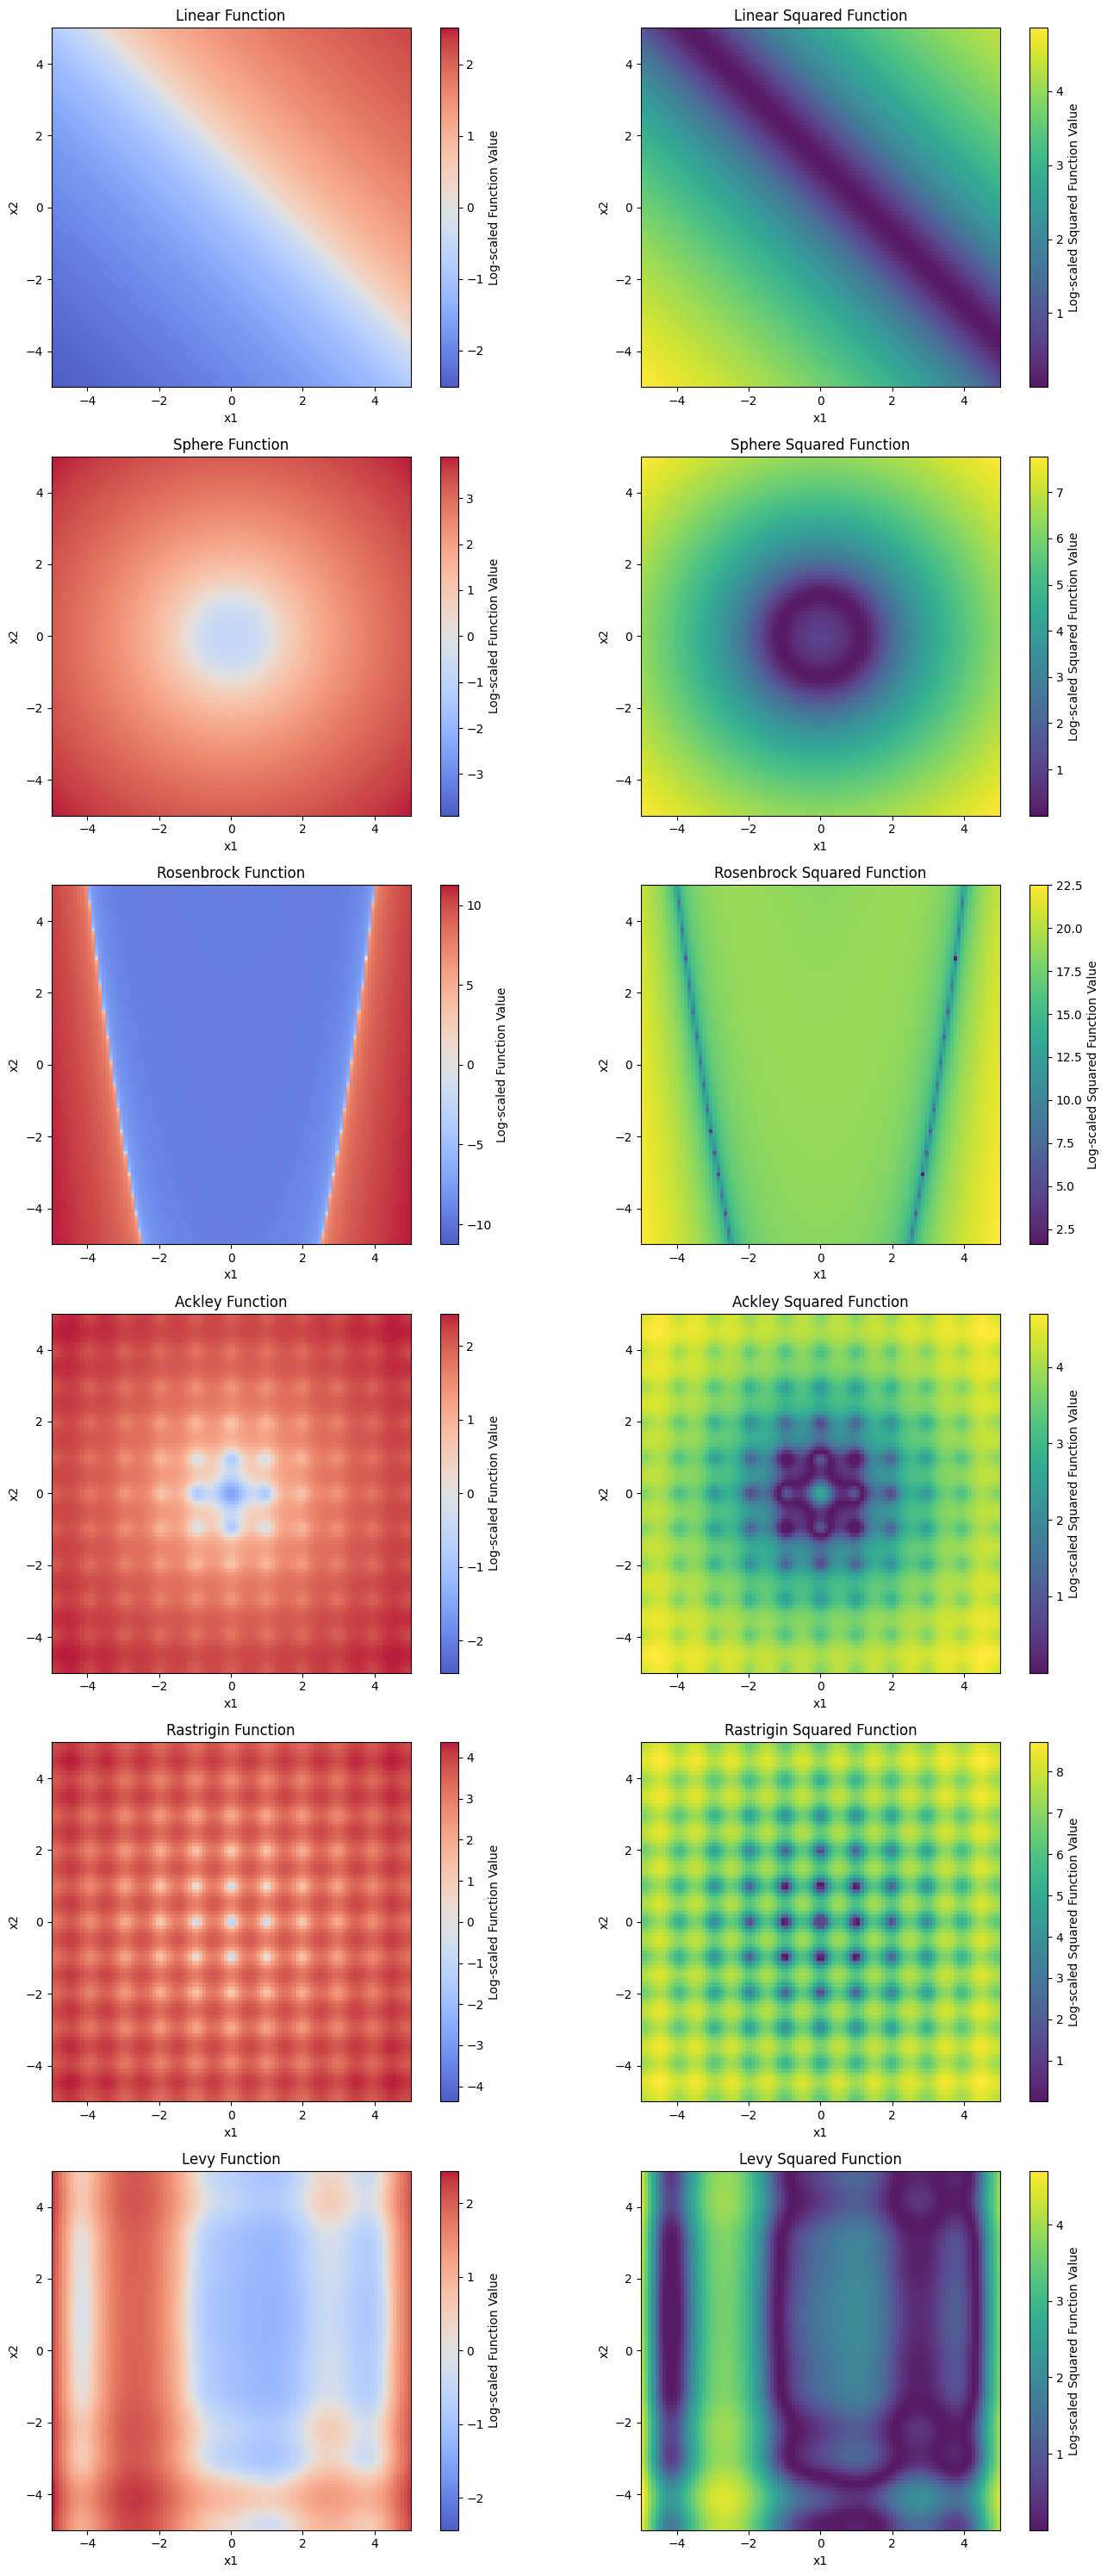

In [42]:
# Generate side-by-side heatmaps for original and squared function values

fig, axs = plt.subplots(len(functions), 2, figsize=(14, 5 * len(functions)))

# Iterate over all functions and plot original and squared versions
for i, (name, func) in enumerate(functions.items()):
    # Compute function values with shifting factor
    Z = np.array([func([x, y], shifting_function[name]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    # Apply symmetric logarithmic scaling for the original function
    epsilon = 1e-6  # Small constant to prevent log(0)
    Z_signed_log = np.sign(Z) * np.log1p(np.abs(Z) + epsilon)  # Keeps zero as threshold

    # Define color range centered at zero for the original function
    max_abs_value = np.max(np.abs(Z_signed_log))
    vmin_orig, vmax_orig = -max_abs_value, max_abs_value

    # Create heatmap for original function with symmetric log scale
    cmap_orig = axs[i, 0].imshow(Z_signed_log, extent=[-5, 5, -5, 5], origin="lower", cmap="coolwarm", alpha=0.9, vmin=vmin_orig, vmax=vmax_orig)
    axs[i, 0].set_title(f"{name} Function")
    axs[i, 0].set_xlabel("x1")
    axs[i, 0].set_ylabel("x2")
    fig.colorbar(cmap_orig, ax=axs[i, 0], label="Log-scaled Function Value")

    # Square the function values and apply log scaling
    Z_squared = np.log1p(Z ** 2 + epsilon)  # Log transformation for better contrast

    # Define color range for squared function
    vmin_sq, vmax_sq = np.min(Z_squared), np.max(Z_squared)

    # Create heatmap for squared function with a different color map
    cmap_sq = axs[i, 1].imshow(Z_squared, extent=[-5, 5, -5, 5], origin="lower", cmap="viridis", alpha=0.9, vmin=vmin_sq, vmax=vmax_sq)
    axs[i, 1].set_title(f"{name} Squared Function")
    axs[i, 1].set_xlabel("x1")
    axs[i, 1].set_ylabel("x2")
    fig.colorbar(cmap_sq, ax=axs[i, 1], label="Log-scaled Squared Function Value")

plt.tight_layout()
plt.show()


Create one model for each function

In [43]:
# 1. Linear Model
def linear_model(x, a, b):
    x = np.array(x)
    return a * np.sum(x) + b

# 2. Sphere Model (Quadratic)
def sphere_model(x, a, b):
    x = np.array(x)
    return a * np.sum(x**2) + b

# 3. Rosenbrock Model (Shifted Quadratic)
def rosenbrock_model(x, a, b):
    x = np.array(x)
    return a * np.sum((x - 1)**2) + b

# 4. Ackley Model (Exponential)
def ackley_model(x, a, b):
    x = np.array(x)
    return a * np.exp(-b * np.sum(x**2))

# 5. Rastrigin Model (Cosine-Based)
def rastrigin_model(x, a, b):
    x = np.array(x)
    return a * np.sum(x**2) + b * np.sum(np.cos(2 * np.pi * x))

# 6. Levy Model (Sinusoidal)
def levy_model(x, a, b):
    x = np.array(x)
    return a * np.sum(np.sin(np.pi * x)**2) + b

# Problema de modelo simplificar função de custo e diminuir demais a quantidade de mínimos locais, pq o modelo em si já é super direcional e com espaço de busca muito pequeno

# Verificar se consigo fazer algo para não precisar gerar um modelo, só usar a função de custo mesmo

In [44]:
#1) definir parametros da função - OK
#2) Criar o espaço de busca - OK
#3) Criar o espaço de sampling (basicamente o que já temos) - OK
#4) Para cada local do espaço de busca calcular o custo entre a funçao com os parametros naquele espaço e a função original - OK
#5) Plotar gráfico e fazer isso para todos os modelos - OK
#6) Fazer novamente para a função de custo raw ao inves do MSE - OK

In [45]:
# 1. Linear Model
def linear_model(x, a, b):
    x = np.array(x)
    return a * np.sum(x) + b

# 2. Sphere Model (Quadratic)
def sphere_model(x, a, b):
    x = np.array(x)
    return a * np.sum(np.square(x)) + b

# 3. Rosenbrock Model (Shifted Quadratic)
def rosenbrock_model(x, a, b):
    x = np.array(x)
    if len(x) == 2:
        return a * np.sum(100 * (x[1:] - x[:-1]**2)**2 + (x[:-1] - 1)**2) + b
    else:
        return a * np.sum(100 * (x - x**2)**2 + (x - 1)**2) + b

# 4. Ackley Model (Exponential)
def ackley_model(x, a, b):
    x = np.array(x)
    d = len(x)
    return a * (-20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / d)) - np.exp(np.sum(np.cos(2 * np.pi * x)) / d) + 20 + np.e) + b

# 5. Rastrigin Model (Quadratic + Cosine)
def rastrigin_model(x, a, b):
    x = np.array(x)
    d = len(x)
    return a * (10 * d + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))) + b

# 6. Levy Model (Sinusoidal)
def levy_model(x, a, b):
    x = np.array(x)
    w = 1 + (x - 1) / 4
    term1 = np.sin(np.pi * w[0])**2
    term2 = np.sum((w[:-1] - 1)**2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1)**2))
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)
    return a * (term1 + term2 + term3) + b

In [46]:
# 1. Linear Model
def linear_model_b(x, a, b):
    x = np.array(x)
    return a * np.sum(x) + b

# 2. Sphere Model (Quadratic)
def sphere_model_b(x, a, b):
    x = np.array(x)
    return a * np.sum(np.square(x)) + b

# 3. Rosenbrock Model (Shifted Quadratic)
def rosenbrock_model_b(x, a, b):
    x = np.array(x)
    if len(x) == 2:
        return a * np.sum(100 * (x[1:] - x[:-1]**2)**2 + b*(x[:-1] - 1)**2) + b
    else:
        return a * np.sum(100 * (x - x**2)**2 + b * (x - 1)**2) + b

# 4. Ackley Model (Exponential)
def ackley_model_b(x, a, b):
    x = np.array(x)
    d = len(x)
    return a * (-20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / d)) - b * np.exp(np.sum(np.cos(2 * np.pi * x)) / d) + 20 + np.e) + b

# 5. Rastrigin Model (Quadratic + Cosine)
def rastrigin_model_b(x, a, b):
    x = np.array(x)
    d = len(x)
    return a * (10 * d + np.sum(x**2 - b*10 * np.cos(2 * np.pi * x))) + b

# 6. Levy Model (Sinusoidal)
def levy_model_b(x, a, b):
    x = np.array(x)
    w = 1 + (x - 1) / 4
    term1 = np.sin(np.pi * w[0])**2*b
    term2 = np.sum((w[:-1] - 1)**2 * (1 + 10 * b * np.sin(np.pi * w[:-1] + 1)**2))
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)**b
    return a * (term1 + term2 + term3) + b

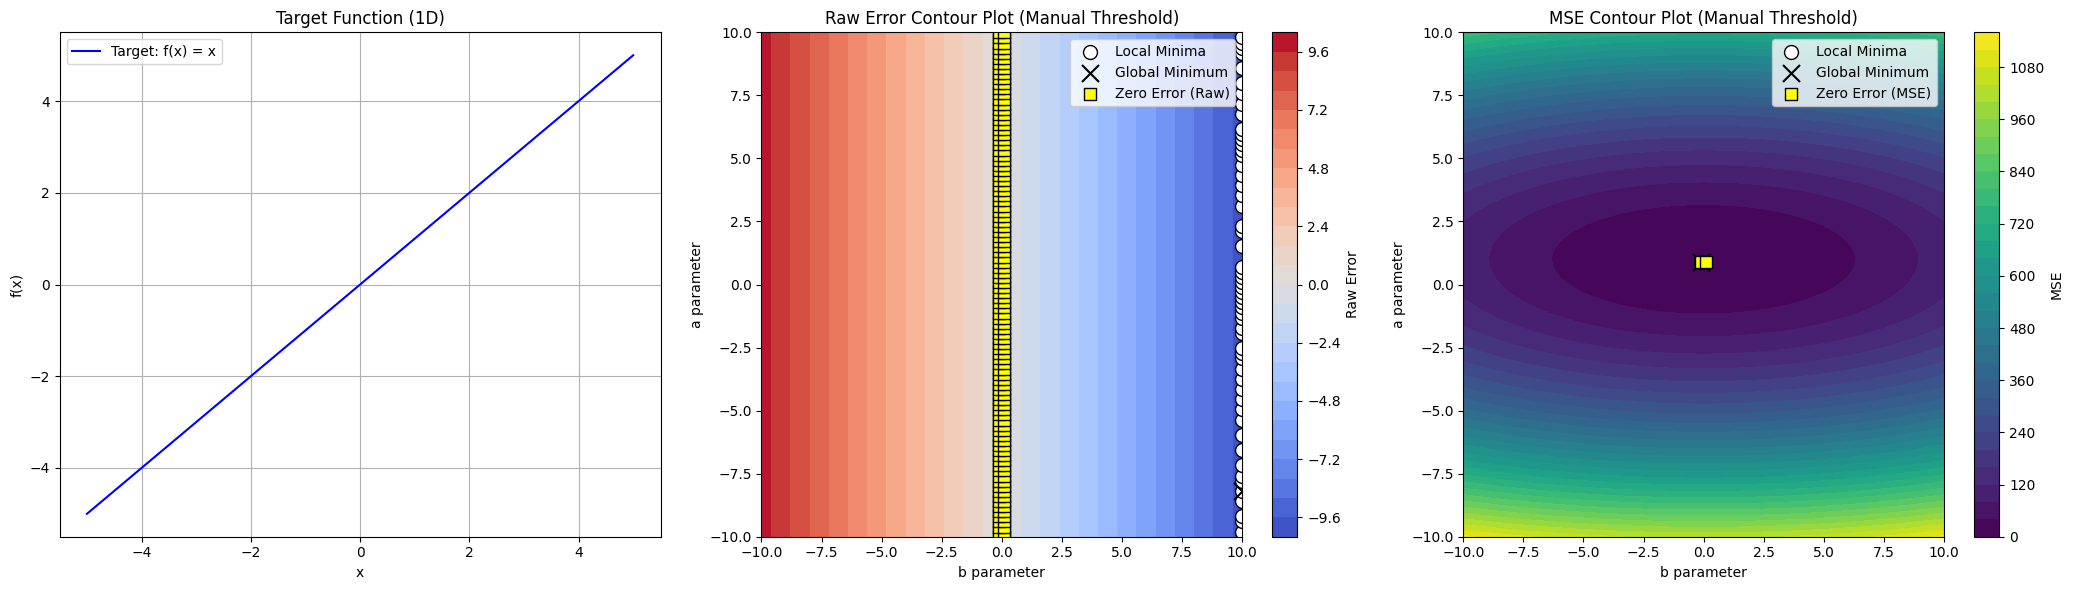

In [47]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

# Define the true parameters for the target function
true_a, true_b = 1, 0  # The real function to fit is f(x) = x

# Define the target function using the linear model with the true parameters
def target_function(x):
    return linear_model(x, true_a, true_b)

# Generate equally spaced sample points in 1D for function evaluation
num_points = 100  # Number of points
x_range_1D = np.linspace(-5, 5, num_points)

# Compute true function values using the target function
true_values_1D = np.array([target_function([x]) for x in x_range_1D])

# Define the search space for parameters a and b
a_values = np.linspace(-10, 10, 100)  # Range of 'a' values
b_values = np.linspace(-10, 10, 100)  # Range of 'b' values

# Compute raw error over the (a, b) grid
error_grid = np.zeros((len(a_values), len(b_values)))
MSE_grid = np.zeros((len(a_values), len(b_values)))

# Calculate raw error and MSE for each (a, b) pair
for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        predicted_values = np.array([linear_model([x], a, b) for x in x_range_1D])
        error_grid[i, j] = np.mean(true_values_1D - predicted_values)  # Raw error
        MSE_grid[i, j] = np.mean((true_values_1D - predicted_values) ** 2)  # MSE

# Find local minima in a given error grid
def find_local_minima(error_grid, a_values, b_values):
    neighborhood_size = 3  # Window size to check local minima
    local_min_mask = (error_grid == scipy.ndimage.minimum_filter(error_grid, size=neighborhood_size))
    
    # Get coordinates of local minima
    local_min_indices = np.argwhere(local_min_mask)
    local_min_a_b = [(a_values[i], b_values[j]) for i, j in local_min_indices]
    
    return local_min_a_b

# Find global minimum in a given error grid
def find_global_minimum(error_grid, a_values, b_values):
    min_index = np.unravel_index(np.argmin(error_grid), error_grid.shape)
    global_min_a_b = (a_values[min_index[0]], b_values[min_index[1]])
    return global_min_a_b

# Find local and global minima for raw error and MSE
local_minima = find_local_minima(error_grid, a_values, b_values)
global_minimum = find_global_minimum(error_grid, a_values, b_values)

local_minima_mse = find_local_minima(MSE_grid, a_values, b_values)
global_minimum_mse = find_global_minimum(MSE_grid, a_values, b_values)

# Define manual thresholds for detecting near-zero points separately for Raw Error and MSE
manual_thresholds = {
    "Raw Error": 0.2,  # Threshold for the raw error plot
    "MSE": 0.1,  # Threshold for the MSE plot
}

# Detect zero-error points using the manually set threshold for Raw Error
zero_threshold_raw = manual_thresholds["Raw Error"]
zero_mask_raw = np.isclose(error_grid, 0, atol=zero_threshold_raw)
zero_a_b_raw = [(a_values[i], b_values[j]) for i, j in np.argwhere(zero_mask_raw)]

# Detect zero-error points using the manually set threshold for MSE
zero_threshold_mse = manual_thresholds["MSE"]
zero_mask_mse = np.isclose(MSE_grid, 0, atol=zero_threshold_mse)
zero_a_b_mse = [(a_values[i], b_values[j]) for i, j in np.argwhere(zero_mask_mse)]

# Create subplots for target function, raw error contour, and MSE contour with manually set thresholds
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Plot the target function (1D)
axs[0].plot(x_range_1D, true_values_1D, color='blue', label="Target: f(x) = x")
axs[0].set_title("Target Function (1D)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].grid(True)
axs[0].legend()

# Plot the raw error contour with marked minima and zero-error points
cmap1 = axs[1].contourf(b_values, a_values, error_grid, levels=30, cmap="coolwarm")  # Contour plot

# Mark local minima for raw error
for a, b in local_minima:
    axs[1].scatter(b, a, color="white", marker="o", edgecolors="black", s=100, label="Local Minima" if "Local Minima" not in axs[1].get_legend_handles_labels()[1] else "")

# Mark global minimum for raw error
axs[1].scatter(global_minimum[1], global_minimum[0], color="black", marker="x", s=150, label="Global Minimum")

# Mark points where the raw error is approximately zero using its manual threshold
for a, b in zero_a_b_raw:
    axs[1].scatter(b, a, color="yellow", marker="s", edgecolors="black", s=80, label="Zero Error (Raw)" if "Zero Error (Raw)" not in axs[1].get_legend_handles_labels()[1] else "")

# Labels and title for raw error plot
axs[1].set_title("Raw Error Contour Plot (Manual Threshold)")
axs[1].set_xlabel("b parameter")
axs[1].set_ylabel("a parameter")
fig.colorbar(cmap1, ax=axs[1], label="Raw Error")
axs[1].legend()

# Plot the MSE contour plot with correctly detected minima
cmap2 = axs[2].contourf(b_values, a_values, MSE_grid, levels=30, cmap="viridis")  # Contour plot

# Mark local minima for MSE
for a, b in local_minima_mse:
    axs[2].scatter(b, a, color="white", marker="o", edgecolors="black", s=100, label="Local Minima" if "Local Minima" not in axs[2].get_legend_handles_labels()[1] else "")

# Mark global minimum for MSE
axs[2].scatter(global_minimum_mse[1], global_minimum_mse[0], color="black", marker="x", s=150, label="Global Minimum")

# Mark points where the MSE is approximately zero using its manual threshold
for a, b in zero_a_b_mse:
    axs[2].scatter(b, a, color="yellow", marker="s", edgecolors="black", s=80, label="Zero Error (MSE)" if "Zero Error (MSE)" not in axs[2].get_legend_handles_labels()[1] else "")

# Labels and title for MSE plot
axs[2].set_title("MSE Contour Plot (Manual Threshold)")
axs[2].set_xlabel("b parameter")
axs[2].set_ylabel("a parameter")
fig.colorbar(cmap2, ax=axs[2], label="MSE")
axs[2].legend()

plt.tight_layout()
plt.show()


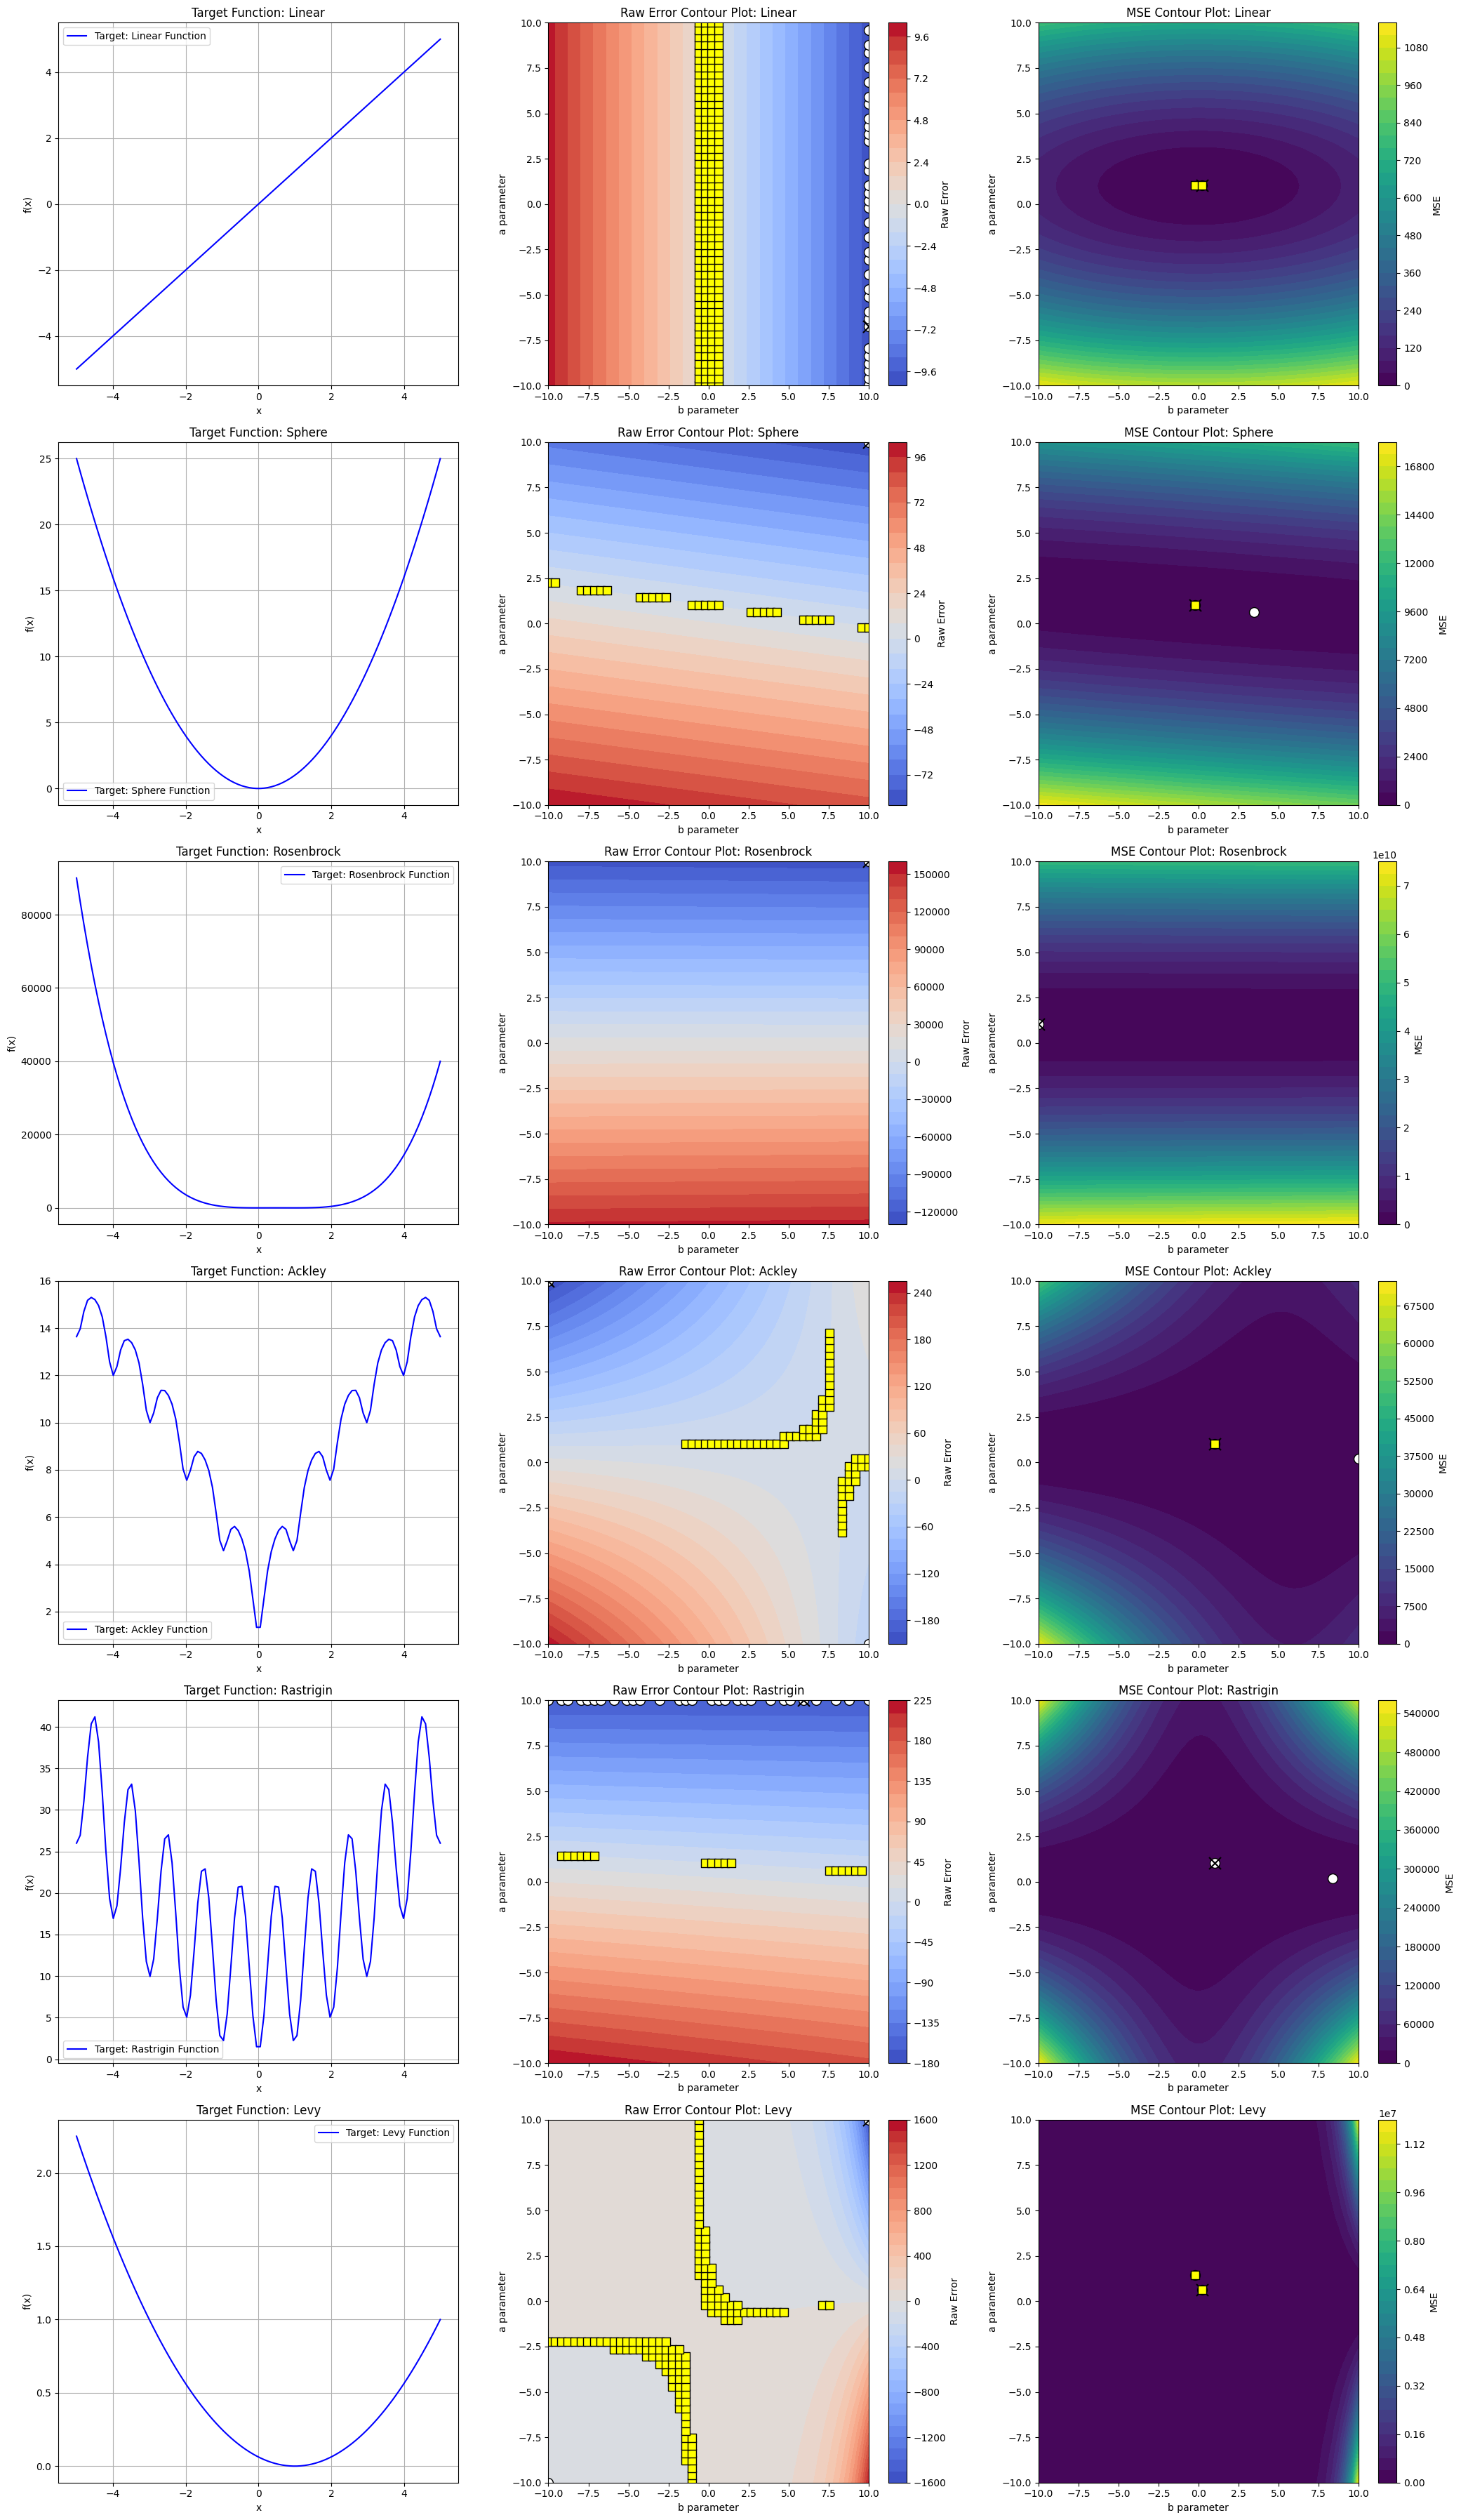

In [53]:
# Define the function mappings
"""
models = {
    "Linear": linear_model,
    "Sphere": sphere_model,
    "Rosenbrock": rosenbrock_model,
    "Ackley": ackley_model,
    "Rastrigin": rastrigin_model,
    "Levy": levy_model
}
"""

models = {
    "Linear": linear_model_b,
    "Sphere": sphere_model_b,
    "Rosenbrock": rosenbrock_model_b,
    "Ackley": ackley_model_b,
    "Rastrigin": rastrigin_model_b,
    "Levy": levy_model_b
}

# Define the true parameters for each function
true_params = {
    "Linear": (1, 0),
    "Sphere": (1, 0),
    "Rosenbrock": (1, 0),
    "Ackley": (1, 1),
    "Rastrigin": (1, 1),
    "Levy": (1, 0),
}

# Define manual thresholds for detecting near-zero points separately for Raw Error and MSE
manual_thresholds = {
    "Raw Error": 1,
    "MSE": 0.1,
}

# Define the search space for parameters a and b
a_values = np.linspace(-10, 10, 50)  
b_values = np.linspace(-10, 10, 50)

# Generate equally spaced sample points in 1D for function evaluation
num_points = 100  
x_range_1D = np.linspace(-5, 5, num_points)

# Create plots for each function
fig, axs = plt.subplots(len(models), 3, figsize=(21, 6 * len(models)))

for idx, (name, model) in enumerate(models.items()):
    # Define the target function using the true parameters
    true_a, true_b = true_params[name]
    def target_function(x):
        return model(x, true_a, true_b)

    # Compute true function values
    true_values_1D = np.array([target_function([x]) for x in x_range_1D])

    # Compute raw error and MSE over the (a, b) grid
    error_grid = np.zeros((len(a_values), len(b_values)))
    MSE_grid = np.zeros((len(a_values), len(b_values)))

    for i, a in enumerate(a_values):
        for j, b in enumerate(b_values):
            predicted_values = np.array([model([x], a, b) for x in x_range_1D])
            error_grid[i, j] = np.mean(true_values_1D - predicted_values)  
            MSE_grid[i, j] = np.mean((true_values_1D - predicted_values) ** 2)  

    # Find local and global minima for raw error and MSE
    local_minima = find_local_minima(error_grid, a_values, b_values)
    global_minimum = find_global_minimum(error_grid, a_values, b_values)

    local_minima_mse = find_local_minima(MSE_grid, a_values, b_values)
    global_minimum_mse = find_global_minimum(MSE_grid, a_values, b_values)

    # Detect zero-error points
    zero_threshold_raw = manual_thresholds["Raw Error"]
    zero_mask_raw = np.isclose(error_grid, 0, atol=zero_threshold_raw)
    zero_a_b_raw = [(a_values[i], b_values[j]) for i, j in np.argwhere(zero_mask_raw)]

    zero_threshold_mse = manual_thresholds["MSE"]
    zero_mask_mse = np.isclose(MSE_grid, 0, atol=zero_threshold_mse)
    zero_a_b_mse = [(a_values[i], b_values[j]) for i, j in np.argwhere(zero_mask_mse)]

    # Plot the target function (1D)
    axs[idx, 0].plot(x_range_1D, true_values_1D, color='blue', label=f"Target: {name} Function")
    axs[idx, 0].set_title(f"Target Function: {name}")
    axs[idx, 0].set_xlabel("x")
    axs[idx, 0].set_ylabel("f(x)")
    axs[idx, 0].grid(True)
    axs[idx, 0].legend()

    # Plot the raw error contour with marked minima and zero-error points
    cmap1 = axs[idx, 1].contourf(b_values, a_values, error_grid, levels=30, cmap="coolwarm")  

    for a, b in local_minima:
        axs[idx, 1].scatter(b, a, color="white", marker="o", edgecolors="black", s=100)

    axs[idx, 1].scatter(global_minimum[1], global_minimum[0], color="black", marker="x", s=150, label="Global Minimum")

    for a, b in zero_a_b_raw:
        axs[idx, 1].scatter(b, a, color="yellow", marker="s", edgecolors="black", s=80, label="Zero Error (Raw)")

    axs[idx, 1].set_title(f"Raw Error Contour Plot: {name}")
    axs[idx, 1].set_xlabel("b parameter")
    axs[idx, 1].set_ylabel("a parameter")
    fig.colorbar(cmap1, ax=axs[idx, 1], label="Raw Error")

    # Plot the MSE contour plot with correctly detected minima
    cmap2 = axs[idx, 2].contourf(b_values, a_values, MSE_grid, levels=30, cmap="viridis")  

    for a, b in local_minima_mse:
        axs[idx, 2].scatter(b, a, color="white", marker="o", edgecolors="black", s=100)

    axs[idx, 2].scatter(global_minimum_mse[1], global_minimum_mse[0], color="black", marker="x", s=150, label="Global Minimum")

    for a, b in zero_a_b_mse:
        axs[idx, 2].scatter(b, a, color="yellow", marker="s", edgecolors="black", s=80, label="Zero Error (MSE)")

    axs[idx, 2].set_title(f"MSE Contour Plot: {name}")
    axs[idx, 2].set_xlabel("b parameter")
    axs[idx, 2].set_ylabel("a parameter")
    fig.colorbar(cmap2, ax=axs[idx, 2], label="MSE")

plt.tight_layout()
plt.show()


Criar metodologia de cruzamento e banch and bound

Simpliflied version

In [49]:
#1) Define two random sampling until they present different signals
#2) Walk from one to the other using a half distance
#3) Define a tolerance away from absolute zero
#4) Calculate the raw error gradient
#5) Decide the next steps

Complete version

In [50]:
#1) Define set of extreme points
#2) Choose the most distant two points that have different signals (or other probabilistic property)
#3) Take a point in the middle
#3.5) Somehow need to keep history, and define the algorithm to do the choice
#4) Do a divide and conquer untill it is near zero, or some point in which it is better to follow the gradient instead of the cut in half
#5) Find the optimal for the raw error (It could be either a point or a countinous line, if it is a point the whole logic boils down, but it can't be for raw error!)
#6) If it is a line, or even volume, follow the path until the MSE minima is found
#7) Keep looking for minimas and set threshold for area that are possible to be in (The true result is probably not in sharp points? it doesnt seem right in general)

Testar 1D

Testar 2D

Criar modelo para representar função

Tirar função de custo de diferença entre os dois

Treinar modelo ao inves de função de custo aleatoria

Visualizar cenários

Definir base de dados utilizada